In [1]:
import pandas as pd
from datetime import datetime
import plotly.express as px
import matplotlib.pyplot as plt
plt.close("all")

# ESTUDOS USANDO DADOS DIEESE
## Carregando dados e tratando tabelas

In [3]:
dieese_salarios = pd.read_excel('./data/dieese_salario_real.xlsx')
dieese_salarios

,Mes,Ano,Salário mínimo nominal,Salário mínimo necessário
0,Maio,2021,"R$ 1.100,00","R$ 5351,11"
1,Abril,2021,"R$ 1.100,00","R$ 5.330,69"
2,Março,2021,"R$ 1.100,00","R$ 5.315,74"
3,Fevereiro,2021,"R$ 1.100,00","R$ 5.375,05"
4,Janeiro,2021,"R$ 1.100,00","R$ 5.495,52"
...,...,...,...,...
318,Novembro,1994,"R$ 70,00","R$ 744,25"
319,Outubro,1994,"R$ 70,00","R$ 740,83"
320,Setembro,1994,"R$ 70,00","R$ 695,64"
321,Agosto,1994,"R$ 64,79","R$ 645,53"


### Normalizando nomes de colunas e removendo acentos

In [4]:
dieese_salarios.columns = ['_'.join(word.upper() for word in x.split()) for x in dieese_salarios.columns]
dieese_salarios.columns = dieese_salarios.columns.str.replace('Á', 'A', regex=True)
dieese_salarios.columns = dieese_salarios.columns.str.replace('Í', 'I', regex=True)
dieese_salarios.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 323 entries, 0 to 322
Data columns (total 4 columns):
 #   Column                     Non-Null Count  Dtype 
---  ------                     --------------  ----- 
 0   MES                        323 non-null    object
 1   ANO                        323 non-null    int64 
 2   SALARIO_MINIMO_NOMINAL     323 non-null    object
 3   SALARIO_MINIMO_NECESSARIO  323 non-null    object
dtypes: int64(1), object(3)
memory usage: 10.2+ KB


### Convertendo tipos de colunas para estampas de data

In [5]:
dicionario_mes = {
    'Janeiro': 1,
    'Fevereiro': 2,
    'Março': 3,
    'Abril': 4,
    'Maio': 5,
    'Junho': 6,
    'Julho': 7,
    'Agosto': 8,
    'Setembro': 9,
    'Outubro': 10,
    'Novembro': 11,
    'Dezembro': 12
}
dieese_salarios["DATA"] = [datetime(year=ano, month=mes, day=1) for ano, mes in zip(dieese_salarios["ANO"], dieese_salarios["MES"].map(dicionario_mes))]
dieese_salarios = dieese_salarios.drop(['MES', 'ANO'], axis=1)

### Convertendo valores para números em ponto flutuante

In [6]:
coluna_sem_virgula = dieese_salarios["SALARIO_MINIMO_NOMINAL"].replace('[,]\d+', '', regex=True)
dieese_salarios["SALARIO_MINIMO_NOMINAL"] = coluna_sem_virgula.replace('[R\$\.]', '', regex=True).astype(float)
coluna_sem_virgula = dieese_salarios["SALARIO_MINIMO_NECESSARIO"].replace('[,]\d+', '', regex=True)
dieese_salarios["SALARIO_MINIMO_NECESSARIO"] = coluna_sem_virgula.replace('[R\$\.]', '', regex=True).astype(float)
dieese_salarios

,SALARIO_MINIMO_NOMINAL,SALARIO_MINIMO_NECESSARIO,DATA
0,1100.0,5351.0,2021-05-01
1,1100.0,5330.0,2021-04-01
2,1100.0,5315.0,2021-03-01
3,1100.0,5375.0,2021-02-01
4,1100.0,5495.0,2021-01-01
...,...,...,...
318,70.0,744.0,1994-11-01
319,70.0,740.0,1994-10-01
320,70.0,695.0,1994-09-01
321,64.0,645.0,1994-08-01


<AxesSubplot:xlabel='DATA'>

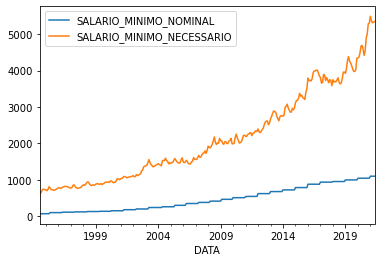

In [25]:
dieese_salarios[["SALARIO_MINIMO_NOMINAL", "SALARIO_MINIMO_NECESSARIO"]].plot()

### Indexado dados com a data

In [21]:
dieese_salarios['DATA'] = dieese_salarios.index
dieese_salarios.sort_index(ascending=True, inplace=True)
dieese_salarios

,SALARIO_MINIMO_NOMINAL,SALARIO_MINIMO_NECESSARIO,PERCENTUAL_NOMINAL_NECESSARIO
DATA,,,
2021-05-01,1100.0,5351.0,20.556905
2021-04-01,1100.0,5330.0,20.637899
2021-03-01,1100.0,5315.0,20.696143
2021-02-01,1100.0,5375.0,20.465116
2021-01-01,1100.0,5495.0,20.018198
...,...,...,...
1994-11-01,70.0,744.0,9.408602
1994-10-01,70.0,740.0,9.459459
1994-09-01,70.0,695.0,10.071942


## Comparando Salários
### Valor percentual relativo do salário nominal em relação ao necessário(salário nominal/salário necessário)

In [22]:
dieese_salarios["PERCENTUAL_NOMINAL_NECESSARIO"] = 100 * dieese_salarios["SALARIO_MINIMO_NOMINAL"]/dieese_salarios["SALARIO_MINIMO_NECESSARIO"]
dieese_salarios

,SALARIO_MINIMO_NOMINAL,SALARIO_MINIMO_NECESSARIO,PERCENTUAL_NOMINAL_NECESSARIO
DATA,,,
2021-05-01,1100.0,5351.0,20.556905
2021-04-01,1100.0,5330.0,20.637899
2021-03-01,1100.0,5315.0,20.696143
2021-02-01,1100.0,5375.0,20.465116
2021-01-01,1100.0,5495.0,20.018198
...,...,...,...
1994-11-01,70.0,744.0,9.408602
1994-10-01,70.0,740.0,9.459459
1994-09-01,70.0,695.0,10.071942


<AxesSubplot:xlabel='DATA'>

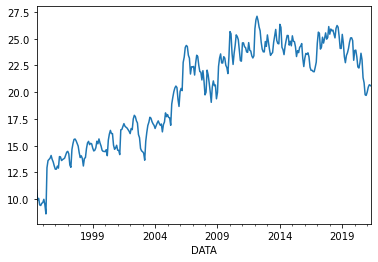

In [24]:
dieese_salarios["PERCENTUAL_NOMINAL_NECESSARIO"].plot()

### Valor médio entre o salário nominal eo necessário(salário nominal + salário necessário)/2

In [27]:
dieese_salarios["MEDIA_VALORES_SALARIOS"] = (dieese_salarios["SALARIO_MINIMO_NOMINAL"] + dieese_salarios["SALARIO_MINIMO_NECESSARIO"])/2
dieese_salarios

,SALARIO_MINIMO_NOMINAL,SALARIO_MINIMO_NECESSARIO,PERCENTUAL_NOMINAL_NECESSARIO,MEDIA_VALORES_SALARIOS
DATA,,,,
2021-05-01,1100.0,5351.0,20.556905,3225.5
2021-04-01,1100.0,5330.0,20.637899,3215.0
2021-03-01,1100.0,5315.0,20.696143,3207.5
2021-02-01,1100.0,5375.0,20.465116,3237.5
2021-01-01,1100.0,5495.0,20.018198,3297.5
...,...,...,...,...
1994-11-01,70.0,744.0,9.408602,407.0
1994-10-01,70.0,740.0,9.459459,405.0
1994-09-01,70.0,695.0,10.071942,382.5


<AxesSubplot:xlabel='DATA'>

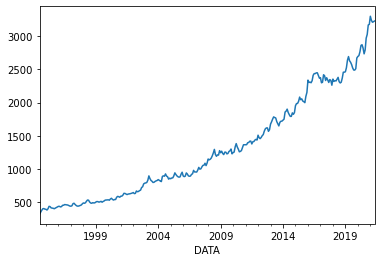

In [28]:
dieese_salarios["MEDIA_VALORES_SALARIOS"].plot()

## Calculando a variação salarial mensal

In [30]:
dieese_salarios

,SALARIO_MINIMO_NOMINAL,SALARIO_MINIMO_NECESSARIO,PERCENTUAL_NOMINAL_NECESSARIO,MEDIA_VALORES_SALARIOS,DATA
DATA,,,,,
1994-07-01,64.0,590.0,10.847458,327.0,1994-07-01
1994-08-01,64.0,645.0,9.922481,354.5,1994-08-01
1994-09-01,70.0,695.0,10.071942,382.5,1994-09-01
1994-10-01,70.0,740.0,9.459459,405.0,1994-10-01
1994-11-01,70.0,744.0,9.408602,407.0,1994-11-01
...,...,...,...,...,...
2021-01-01,1100.0,5495.0,20.018198,3297.5,2021-01-01
2021-02-01,1100.0,5375.0,20.465116,3237.5,2021-02-01
2021-03-01,1100.0,5315.0,20.696143,3207.5,2021-03-01


<AxesSubplot:xlabel='DATA'>

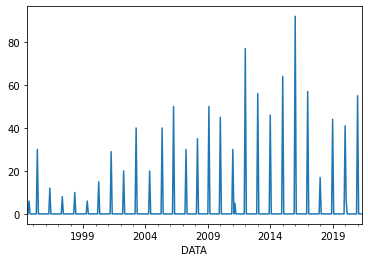

In [145]:
dieese_salarios["DIFERENCA_MENSAL_NOMINAL"] = dieese_salarios["SALARIO_MINIMO_NOMINAL"].diff()
dieese_salarios["DIFERENCA_MENSAL_NOMINAL"].plot()

<AxesSubplot:xlabel='DATA'>

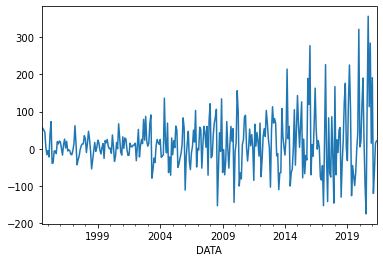

In [146]:
dieese_salarios["DIFERENCA_MENSAL_NECESSARIO"] = dieese_salarios["SALARIO_MINIMO_NECESSARIO"].diff()
dieese_salarios["DIFERENCA_MENSAL_NECESSARIO"].plot()

<AxesSubplot:xlabel='DATA'>

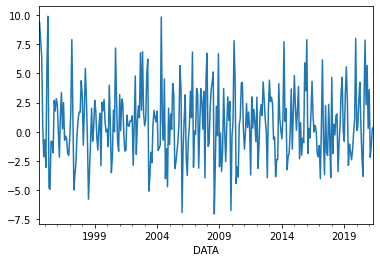

In [177]:
dieese_salarios['PERCENTUAL_DIFERENCA_MENSAL_NECESSARIO'] = dieese_salarios["SALARIO_MINIMO_NECESSARIO"].pct_change() * 100
dieese_salarios['PERCENTUAL_DIFERENCA_MENSAL_NECESSARIO'].plot()

<AxesSubplot:xlabel='DATA'>

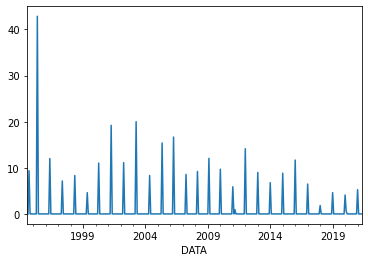

In [179]:
dieese_salarios['PERCENTUAL_DIFERENCA_MENSAL_NOMINAL'] = dieese_salarios["SALARIO_MINIMO_NOMINAL"].pct_change() * 100
dieese_salarios['PERCENTUAL_DIFERENCA_MENSAL_NOMINAL'].plot()

## Granunalizando dados
### Distribuindo colunas de SALÁRIO em linhas

In [180]:
dieese_salario_nominal = dieese_salarios[
    ["DATA", "SALARIO_MINIMO_NOMINAL", "DIFERENCA_MENSAL_NOMINAL",
     'PERCENTUAL_NOMINAL_NECESSARIO', 'PERCENTUAL_DIFERENCA_MENSAL_NOMINAL']].copy()
dieese_salario_nominal["TIPO_SALARIO"] = "NOMINAL"
dieese_salario_nominal = dieese_salario_nominal.rename(columns = {
    'SALARIO_MINIMO_NOMINAL':'VALOR_SALARIO',
    'DIFERENCA_MENSAL_NOMINAL': 'DIFERENCA_MENSAL',
    'PERCENTUAL_DIFERENCA_MENSAL_NOMINAL': 'PERCENTUAL_DIFERENCA_MENSAL',
 })

dieese_salario_necessario = dieese_salarios[
    ["DATA", "SALARIO_MINIMO_NECESSARIO", "DIFERENCA_MENSAL_NECESSARIO",
     'PERCENTUAL_NOMINAL_NECESSARIO', 'PERCENTUAL_DIFERENCA_MENSAL_NECESSARIO']].copy()
dieese_salario_necessario["TIPO_SALARIO"] = "NECESSARIO"
dieese_salario_necessario = dieese_salario_necessario.rename(columns = {
    'SALARIO_MINIMO_NECESSARIO':'VALOR_SALARIO',
    'DIFERENCA_MENSAL_NECESSARIO' : 'DIFERENCA_MENSAL',
    'PERCENTUAL_DIFERENCA_MENSAL_NECESSARIO': 'PERCENTUAL_DIFERENCA_MENSAL',
})

dieese_salario_granulado = dieese_salario_necessario.append(dieese_salario_nominal)
dieese_salario_granulado

,DATA,VALOR_SALARIO,DIFERENCA_MENSAL,PERCENTUAL_NOMINAL_NECESSARIO,PERCENTUAL_DIFERENCA_MENSAL,TIPO_SALARIO
DATA,,,,,,
1994-07-01,1994-07-01,590.0,NaN,10.847458,NaN,NECESSARIO
1994-08-01,1994-08-01,645.0,55.0,9.922481,9.322034,NECESSARIO
1994-09-01,1994-09-01,695.0,50.0,10.071942,7.751938,NECESSARIO
1994-10-01,1994-10-01,740.0,45.0,9.459459,6.474820,NECESSARIO
1994-11-01,1994-11-01,744.0,4.0,9.408602,0.540541,NECESSARIO
...,...,...,...,...,...,...
2021-01-01,2021-01-01,1100.0,55.0,20.018198,5.263158,NOMINAL
2021-02-01,2021-02-01,1100.0,0.0,20.465116,0.000000,NOMINAL
2021-03-01,2021-03-01,1100.0,0.0,20.696143,0.000000,NOMINAL


In [154]:
df = px.data.stocks()
fig = px.line(dieese_salario_granulado, x='DATA', y="VALOR_SALARIO", color='TIPO_SALARIO', hover_name='TIPO_SALARIO')
fig.update_xaxes(rangeslider_visible=True)
fig.show()

In [18]:
fig = px.line(dieese_salario_granulado, x='DATA', y="DIFERENCA_MENSAL", color='TIPO_SALARIO', hover_name='TIPO_SALARIO')
fig.update_xaxes(rangeslider_visible=True)
fig.show()

## Aplicando Regressões

In [33]:
dieese_salario_granulado.info()

<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 646 entries, 1994-07-01 to 2021-05-01
Data columns (total 4 columns):
 #   Column            Non-Null Count  Dtype         
---  ------            --------------  -----         
 0   DATA              646 non-null    datetime64[ns]
 1   VALOR_SALARIO     646 non-null    float64       
 2   DIFERENCA_MENSAL  644 non-null    float64       
 3   TIPO_SALARIO      646 non-null    object        
dtypes: datetime64[ns](1), float64(2), object(1)
memory usage: 25.2+ KB


In [41]:
fig = px.scatter(dieese_salario_granulado, x="DATA", y="VALOR_SALARIO", facet_col="TIPO_SALARIO", trendline="ols")
fig.show()

results = px.get_trendline_results(fig)
print(results)

fig = px.scatter(dieese_salario_granulado, x="DATA", y="VALOR_SALARIO", facet_col="TIPO_SALARIO", trendline="lowess")
fig.show()

results = px.get_trendline_results(fig)
print(results)

  TIPO_SALARIO                                     px_fit_results
0   NECESSARIO  <statsmodels.regression.linear_model.Regressio...
1      NOMINAL  <statsmodels.regression.linear_model.Regressio...


Empty DataFrame
Columns: []
Index: []


## Atribuindo marcações de governo aos dados

In [127]:
lista_governantes_partidos = [
    ('Itamar Franco', 'PMDB'),
    ('Fernando Henrique Cardoso', 'PSDB'),
    ('Fernando Henrique Cardoso', 'PSDB'),
    ('Luiz Inácio Lula da Silva', 'PT'),
    ('Luiz Inácio Lula da Silva', 'PT'),
    ('Dilma Rousseff', 'PT'),
    ('Dilma Rousseff', 'PT'),
    ('Michel Temer', 'PMDB'),
    ('Jair Bolsonaro', 'PSL'),
]

lista_anos_mandatos = [
    ((29, 12, 1992),(1, 1, 1995)),
    ((1, 1, 1995),(1, 1, 1999)),
    ((1, 1, 1999), (1, 1, 2003)),
    ((1, 1, 2003), (1, 1, 2007)),
    ((1, 1, 2007), (1, 1, 2011)),
    ((1, 1, 2011), (1, 1, 2015)),
    ((1, 1, 2015), (31, 8, 2017)),
    ((31, 8, 2017), (1, 1, 2019)),
    ((1, 1, 2019), (1, 1, 2022)),
]

lista_anos_mandatos_datetime = [
    tuple([datetime(year=ano, month=mes, day=dia) for dia, mes, ano in tupla_datas])
    for tupla_datas in lista_anos_mandatos
]
list(zip(lista_anos_mandatos_datetime, lista_governantes_partidos))

[((datetime.datetime(1992, 12, 29, 0, 0), datetime.datetime(1995, 1, 1, 0, 0)),
  ('Itamar Franco', 'PMDB')),
 ((datetime.datetime(1995, 1, 1, 0, 0), datetime.datetime(1999, 1, 1, 0, 0)),
  ('Fernando Henrique Cardoso', 'PSDB')),
 ((datetime.datetime(1999, 1, 1, 0, 0), datetime.datetime(2003, 1, 1, 0, 0)),
  ('Fernando Henrique Cardoso', 'PSDB')),
 ((datetime.datetime(2003, 1, 1, 0, 0), datetime.datetime(2007, 1, 1, 0, 0)),
  ('Luiz Inácio Lula da Silva', 'PT')),
 ((datetime.datetime(2007, 1, 1, 0, 0), datetime.datetime(2011, 1, 1, 0, 0)),
  ('Luiz Inácio Lula da Silva', 'PT')),
 ((datetime.datetime(2011, 1, 1, 0, 0), datetime.datetime(2015, 1, 1, 0, 0)),
  ('Dilma Rousseff', 'PT')),
 ((datetime.datetime(2015, 1, 1, 0, 0), datetime.datetime(2017, 8, 31, 0, 0)),
  ('Dilma Rousseff', 'PT')),
 ((datetime.datetime(2017, 8, 31, 0, 0), datetime.datetime(2019, 1, 1, 0, 0)),
  ('Michel Temer', 'PMDB')),
 ((datetime.datetime(2019, 1, 1, 0, 0), datetime.datetime(2022, 1, 1, 0, 0)),
  ('Jair Bols

In [182]:
for inicio_fim_mandato, governante_partido in zip(lista_anos_mandatos_datetime, lista_governantes_partidos):
    inicio_mandato, fim_mandato = inicio_fim_mandato
    governante, partido = governante_partido
    mascara_intervalo_datas = ( dieese_salario_granulado['DATA'] >= str(inicio_mandato) ) & ( dieese_salario_granulado['DATA'] < str(fim_mandato) )

    dieese_salario_granulado.loc[mascara_intervalo_datas, 'GOVERNANTE'] = governante
    dieese_salario_granulado.loc[mascara_intervalo_datas, 'PARTIDO'] = partido

dieese_salario_granulado

,DATA,VALOR_SALARIO,DIFERENCA_MENSAL,PERCENTUAL_NOMINAL_NECESSARIO,PERCENTUAL_DIFERENCA_MENSAL,TIPO_SALARIO,GOVERNANTE,PARTIDO
DATA,,,,,,,,
1994-07-01,1994-07-01,590.0,NaN,10.847458,NaN,NECESSARIO,Itamar Franco,PMDB
1994-08-01,1994-08-01,645.0,55.0,9.922481,9.322034,NECESSARIO,Itamar Franco,PMDB
1994-09-01,1994-09-01,695.0,50.0,10.071942,7.751938,NECESSARIO,Itamar Franco,PMDB
1994-10-01,1994-10-01,740.0,45.0,9.459459,6.474820,NECESSARIO,Itamar Franco,PMDB
1994-11-01,1994-11-01,744.0,4.0,9.408602,0.540541,NECESSARIO,Itamar Franco,PMDB
...,...,...,...,...,...,...,...,...
2021-01-01,2021-01-01,1100.0,55.0,20.018198,5.263158,NOMINAL,Jair Bolsonaro,PSL
2021-02-01,2021-02-01,1100.0,0.0,20.465116,0.000000,NOMINAL,Jair Bolsonaro,PSL
2021-03-01,2021-03-01,1100.0,0.0,20.696143,0.000000,NOMINAL,Jair Bolsonaro,PSL


In [156]:
df = px.data.stocks()
fig = px.line(
    dieese_salario_granulado, x='DATA', y="VALOR_SALARIO",
    color='GOVERNANTE',  line_group="TIPO_SALARIO", hover_name='TIPO_SALARIO')
fig.update_xaxes(rangeslider_visible=True)
fig.show()

In [158]:
df = px.data.stocks()
fig = px.line(
    dieese_salario_granulado, x='DATA', y="PERCENTUAL_NOMINAL_NECESSARIO",
    color='GOVERNANTE',  line_group="TIPO_SALARIO", hover_name='TIPO_SALARIO')
fig.update_xaxes(rangeslider_visible=True)
fig.show()

In [164]:
fig = px.histogram(
    dieese_salario_granulado, x='DATA', y="VALOR_SALARIO", marginal='rug',
    color="PARTIDO", facet_row="TIPO_SALARIO",
    histfunc="avg", title="Histograma do valor médio anual dos salários nominais e necessários")
fig.update_traces(xbins_size="M12")
fig.update_xaxes(showgrid=True, ticklabelmode="period", dtick="M12")
fig.update_layout(bargap=0.1)

fig.show()

In [172]:
fig = px.histogram(
    dieese_salario_granulado, x='DATA', y="PERCENTUAL_NOMINAL_NECESSARIO",
    color="PARTIDO", facet_row="TIPO_SALARIO",
    histfunc="avg", title="Histograma de médias anuais de percentuais do valor nominal em relação ao necesssário")
fig.update_traces(xbins_size="M12")
fig.update_xaxes(showgrid=True, ticklabelmode="period", dtick="M12")
fig.update_layout(bargap=0.1)

fig.show()

In [183]:
fig = px.histogram(
    dieese_salario_granulado, x='DATA', y="PERCENTUAL_DIFERENCA_MENSAL",
    color="PARTIDO", facet_row="TIPO_SALARIO",
    histfunc="avg", title="Histograma de médias anuais de percentuais do valor nominal em relação ao necesssário")
fig.update_traces(xbins_size="M12")
fig.update_xaxes(showgrid=True, ticklabelmode="period", dtick="M12")
fig.update_layout(bargap=0.1)

fig.show()